<a href="https://colab.research.google.com/github/Atharva-Gaykar/Deep_Learning/blob/main/notebooks/tabular_data/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

## 🔄 Through this project: Churn Modeling Using Ensemble of ANN Models

* Developed a **binary classification model** to predict whether a customer is likely to **churn (1)** or **stay (0)**.
* Dataset included features like **Credit Score, Geography, Gender, Balance, Tenure, Number of Products**, and more.
* Applied preprocessing steps including:

  * **Label Encoding** for categorical variables (e.g., Geography, Gender)
  * **Feature Scaling** using `StandardScaler`
  * Splitting data into **training, validation, and test sets**

---

### 🧠 Ensemble Learning: ANN-Based Approach

* Created and trained **three separate Artificial Neural Network (ANN) models** with different:

  * Layer structures (e.g., number of hidden layers or neurons)
  * Activation functions
  * Dropout rates or regularization
  * Optimizers or learning rates

* Each ANN independently predicted churn as either **0 or 1** (binary classification).

---

### 🔹 Hard Voting Ensemble (with ANNs)

* After making predictions from all three ANN models, I combined them using **hard voting**:

#### ✅ Formula Used:

```python
ensemble_pred_binary = (np.mean(binary_preds, axis=0) > 0.5).astype(int)
```

Where:

* `binary_preds` = an array of shape `(3, n_samples)` containing predictions from all 3 ANNs
* Takes the **average vote across all models**
* If the average > 0.5 → final label = 1 (churn), else 0

✅ This ensemble method helps to **stabilize predictions**, reduce model variance, and improve generalization by combining diverse ANN outputs.

---

### 📈 Evaluation and Results

* Evaluated using:

  * **Accuracy**
  * **Precision, Recall, F1-Score**
  * **Confusion Matrix**
* Learned how combining multiple **independently trained ANNs** can lead to more **robust and reliable predictions** than a single model.
* Gained practical insights into **neural network diversity and ensemble synergy** in churn prediction problems.

---


ACTIVATION FUNCTION USED

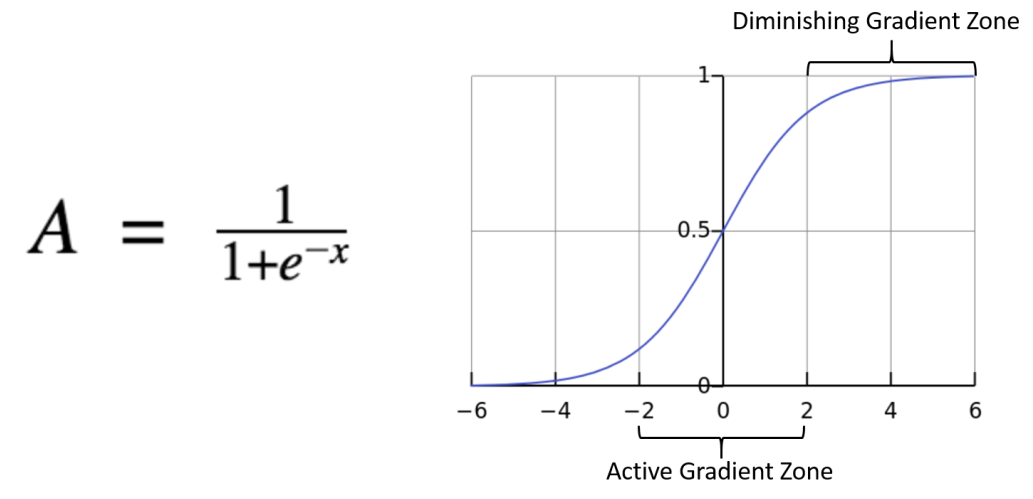

LOSS FUNCTION USED

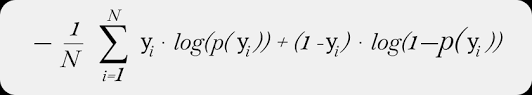

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
raw_dt=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
raw_dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:


duplicate_rows = raw_dt[raw_dt.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows

Number of duplicate rows: 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:

counts=pd.DataFrame(raw_dt['Exited'].value_counts())





In [ ]:
diff = counts.iloc[0, 0] - counts.iloc[1, 0]
print(f"The difference between 'Exited' 0 and 1 is: {diff}")

The difference between 'Exited' 0 and 1 is: 5926


In [ ]:
credit_exited_1=pd.DataFrame(raw_dt[(raw_dt['CreditScore']==850) & (raw_dt['Exited']==1)])
credit_exited_1['Exited'].value_counts()

,count
Exited,
1,43


In [ ]:
credit_exited_0=pd.DataFrame(raw_dt[(raw_dt['CreditScore']==850) & (raw_dt['Exited']==0)])
credit_exited_0['Exited'].value_counts()

,count
Exited,
0,190


In [ ]:
raw_dt

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
raw_dt

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
categorical_column_dt=raw_dt.select_dtypes('object').columns.to_list()


(array([[  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.],
        [ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

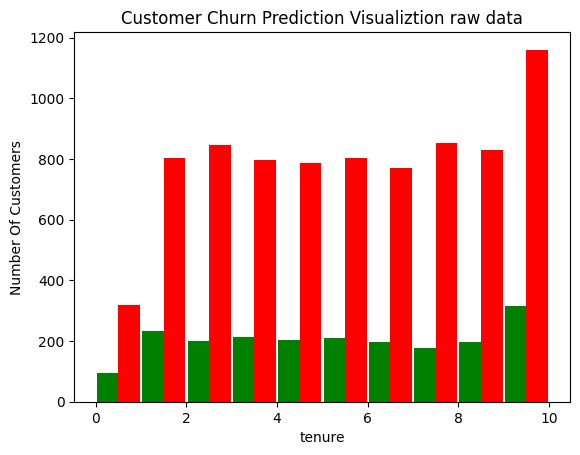

In [ ]:
tenure_churn_no = raw_dt[raw_dt.Exited==0].Tenure
tenure_churn_yes = raw_dt[raw_dt.Exited==1].Tenure


plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion raw data")



plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=1','Churn=0'])

(array([[4.600e+01, 1.670e+02, 4.730e+02, 5.620e+02, 4.470e+02, 2.690e+02,
         5.800e+01, 1.400e+01, 1.000e+00, 0.000e+00],
        [5.650e+02, 2.012e+03, 3.156e+03, 1.309e+03, 3.810e+02, 2.540e+02,
         1.500e+02, 1.130e+02, 1.900e+01, 4.000e+00]]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 2 BarContainer objects>)

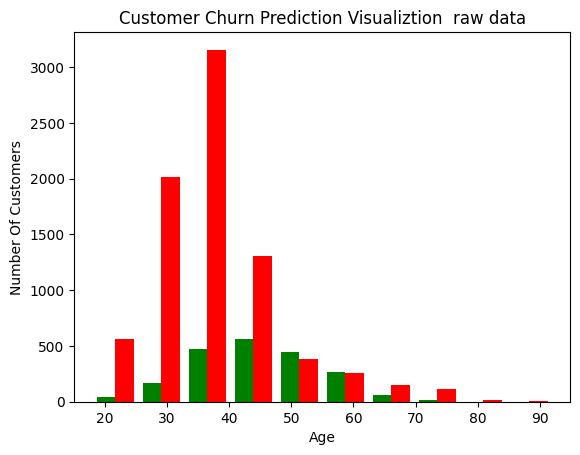

In [ ]:
Age_churn_no = raw_dt[raw_dt.Exited==0].Age
Age_churn_yes = raw_dt[raw_dt.Exited==1].Age


plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion  raw data")



plt.hist([Age_churn_yes,Age_churn_no], color=['green','red'],label=['Churn=1','Churn=0'])

(array([[5.040e+02, 2.200e+01, 8.000e+01, 2.260e+02, 5.590e+02, 4.280e+02,
         1.560e+02, 4.300e+01, 1.700e+01, 2.000e+00],
        [3.119e+03, 4.700e+01, 2.800e+02, 9.470e+02, 1.522e+03, 1.319e+03,
         5.730e+02, 1.430e+02, 1.300e+01, 0.000e+00]]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 2 BarContainer objects>)

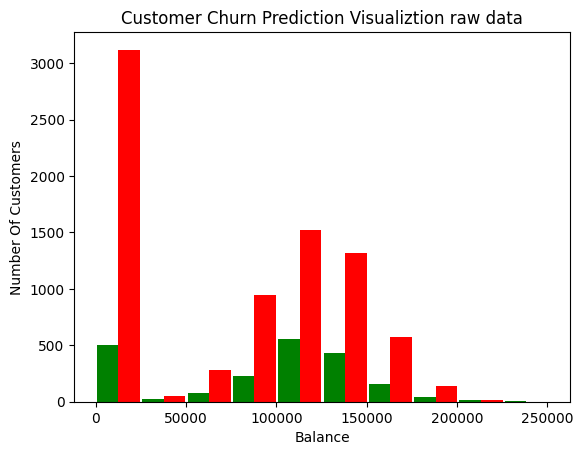

In [ ]:
Balance_churn_no = raw_dt[raw_dt.Exited==0].Balance
Balance_churn_yes = raw_dt[raw_dt.Exited==1].Balance


plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion raw data")



plt.hist([Balance_churn_yes, Balance_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=1','Churn=0'])

In [ ]:
original_data=raw_dt.copy()


In [ ]:
original_target=original_data['Exited']

In [ ]:
original_data=original_data.drop(['RowNumber','CustomerId','Surname'],axis=1)
original_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
original_data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
num_dt_list=original_data.select_dtypes(exclude='object').columns.to_list()
num_dt_list

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
numerical_dt=original_data[num_dt_list]
numerical_dt

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


<ipython-input-19-416725532f64>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=numerical_dt["Exited"], palette= cols)


<Axes: xlabel='Exited', ylabel='count'>

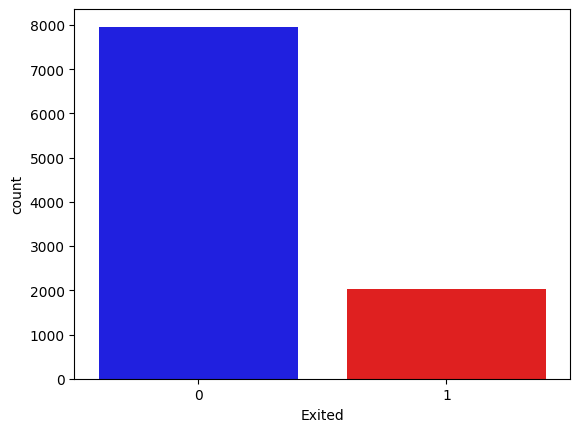

In [ ]:
cols= ["blue","red"]
sns.countplot(x=numerical_dt["Exited"], palette= cols)

Text(0.5, 1.0, 'Distribution Of Age')

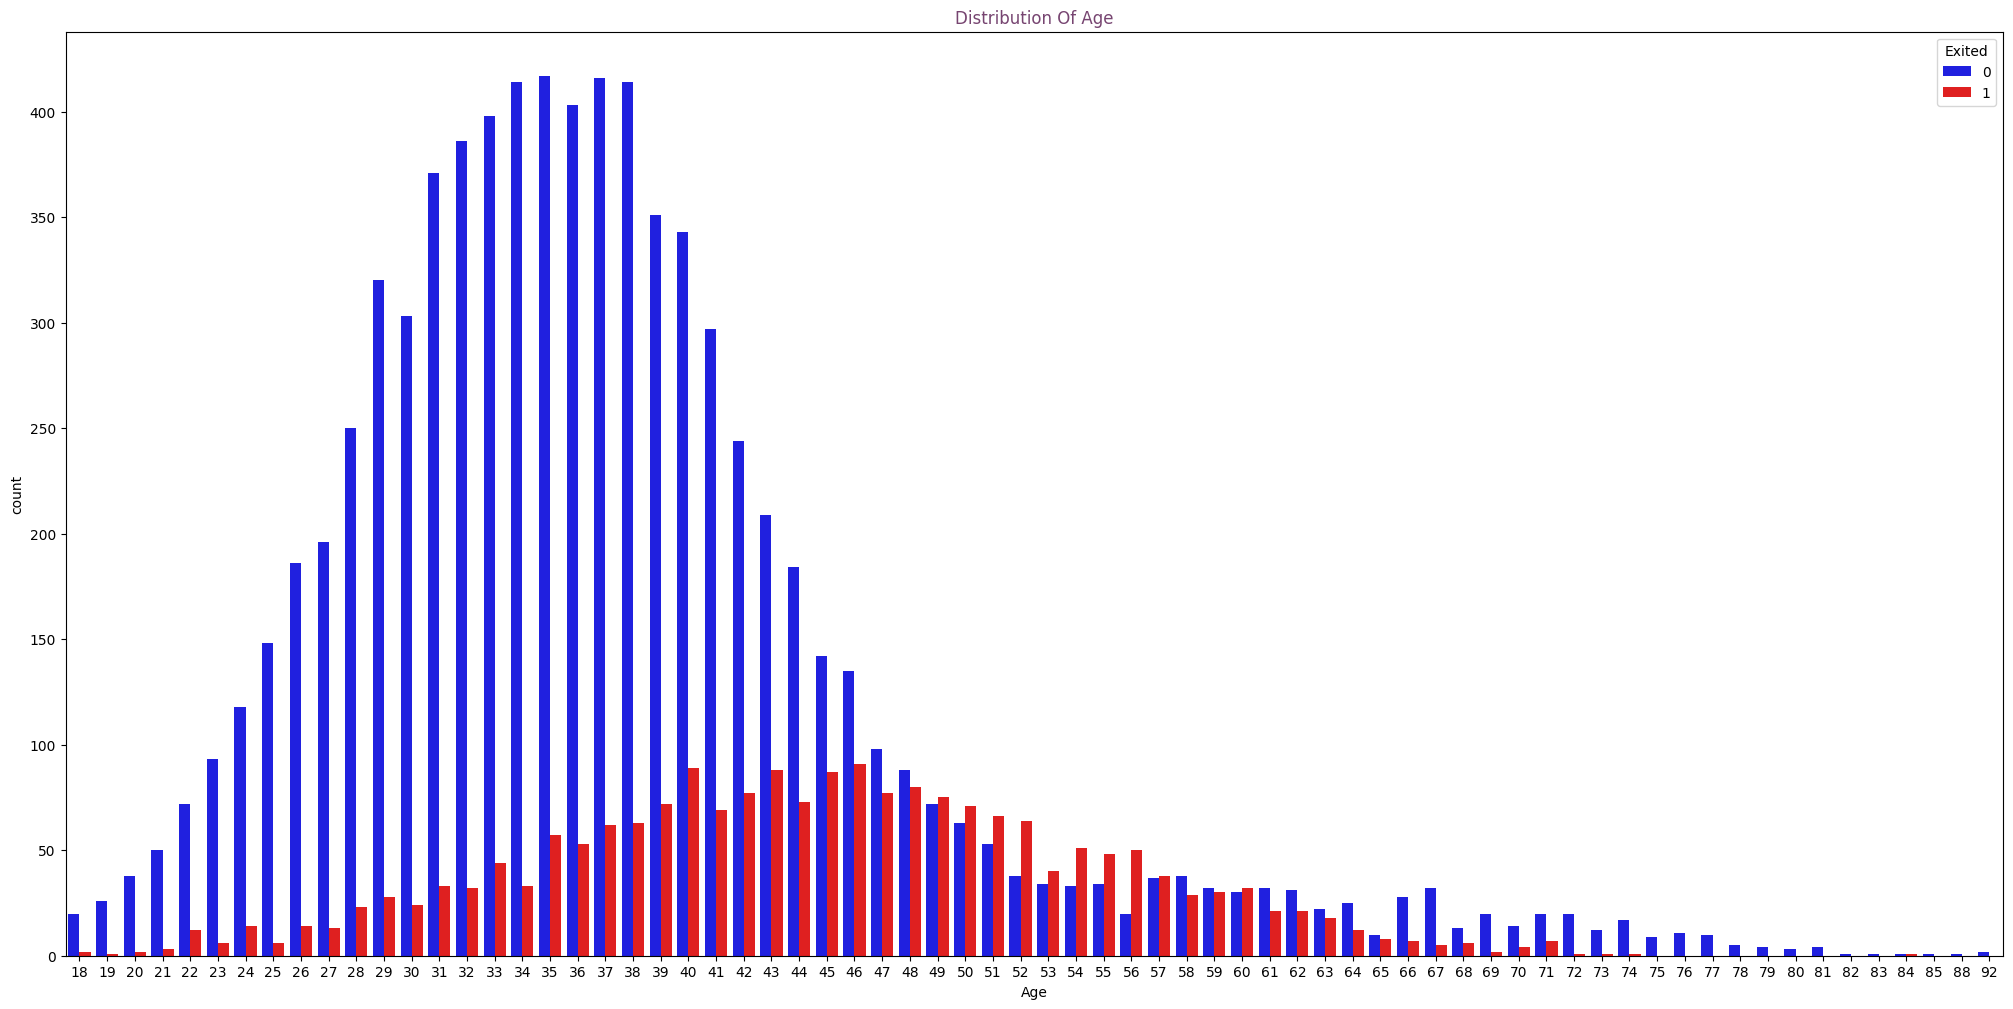

In [ ]:
plt.figure(figsize=(25,12))

Age_plot=sns.countplot(x=numerical_dt['Age'],data=raw_dt, hue ="Exited",palette = cols)
Age_plot.set_title("Distribution Of Age", color="#774571")

<ipython-input-21-400f3a1ea6ab>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_dt['Age'])


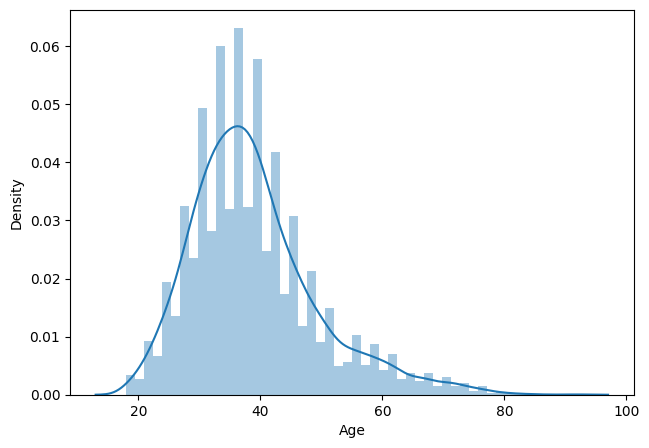

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(numerical_dt['Age'])

plt.show()

<ipython-input-22-859256c366f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=raw_dt, palette=cols_1)


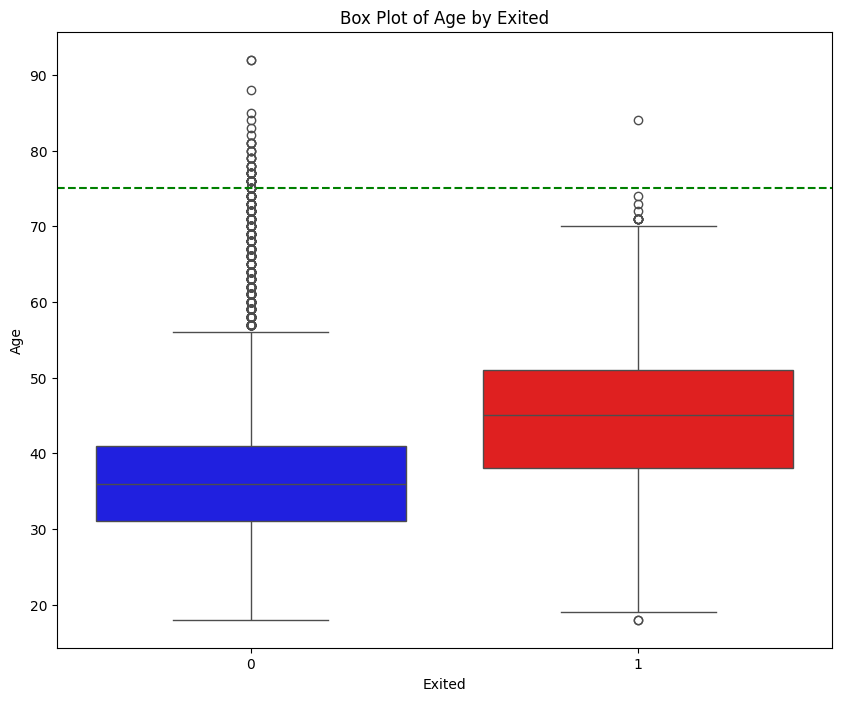

In [ ]:
cols_1= ["blue","red"]

plt.figure(figsize=(10, 8))
sns.boxplot(x='Exited', y='Age', data=raw_dt, palette=cols_1)
plt.title('Box Plot of Age by Exited')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.axhline(y=75, color='green', linestyle='--')
plt.show()


In [ ]:
numerical_dt[(numerical_dt['Age']>75) &(numerical_dt['Exited']==1)]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3531,408,84,8,87873.39,1,0,0,188484.52,1


In [ ]:
numerical_dt[(numerical_dt['Age']>75) &(numerical_dt['Exited']==0)]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
252,681,79,0,0.00,2,0,1,170968.99,0
310,652,80,4,0.00,2,1,1,188603.07,0
766,700,82,2,0.00,2,0,1,182055.36,0
1205,780,76,10,121313.88,1,0,1,64872.33,0
1614,641,77,9,0.00,3,1,1,81514.06,0
2164,767,77,8,149083.70,1,1,1,190146.83,0
2458,513,88,10,0.00,2,1,1,52952.24,0
2925,717,76,9,138489.66,1,1,1,68400.14,0
3033,787,85,10,0.00,2,1,1,116537.96,0
3142,697,76,7,0.00,2,0,1,188772.45,0


In [ ]:
rows_to_drop = numerical_dt[numerical_dt['Age'] > 75].index
numerical_dt = numerical_dt.drop(rows_to_drop)

In [ ]:


numerical_dt.loc[numerical_dt['Age'] > 70, 'Age'] = 70


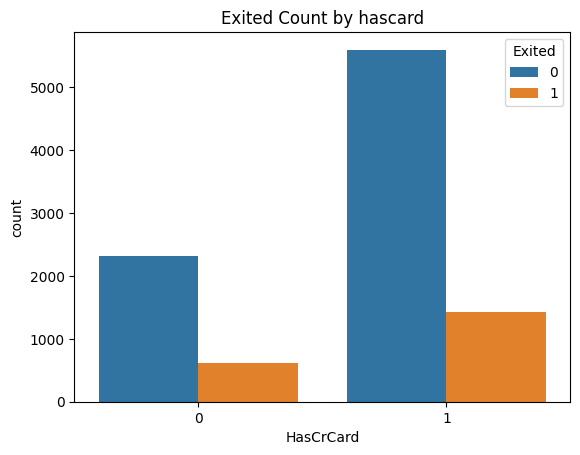

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='HasCrCard', hue='Exited', data=numerical_dt)
plt.title("Exited Count by hascard")
plt.show()

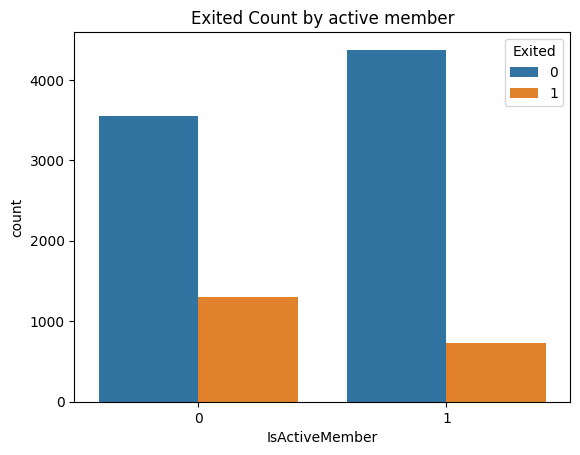

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='IsActiveMember', hue='Exited', data=numerical_dt)
plt.title("Exited Count by active member")
plt.show()

In [ ]:
num_dt_list

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

Text(0.5, 1.0, 'Distribution Of num_of_products')

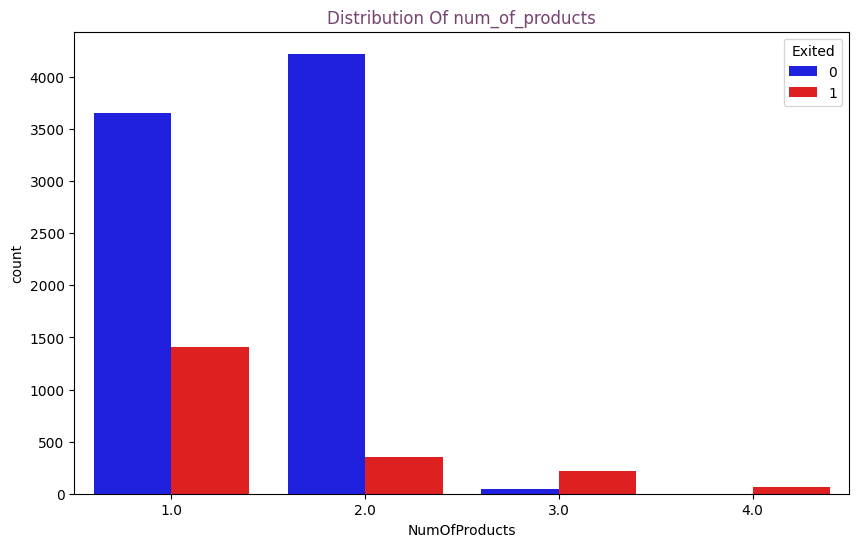

In [ ]:
plt.figure(figsize=(10,6))

Age_plot=sns.countplot(x=numerical_dt['NumOfProducts'],data=raw_dt, hue ="Exited",palette = cols)
Age_plot.set_title("Distribution Of num_of_products", color="#774571")

Text(0.5, 1.0, 'Distribution Of Tenure')

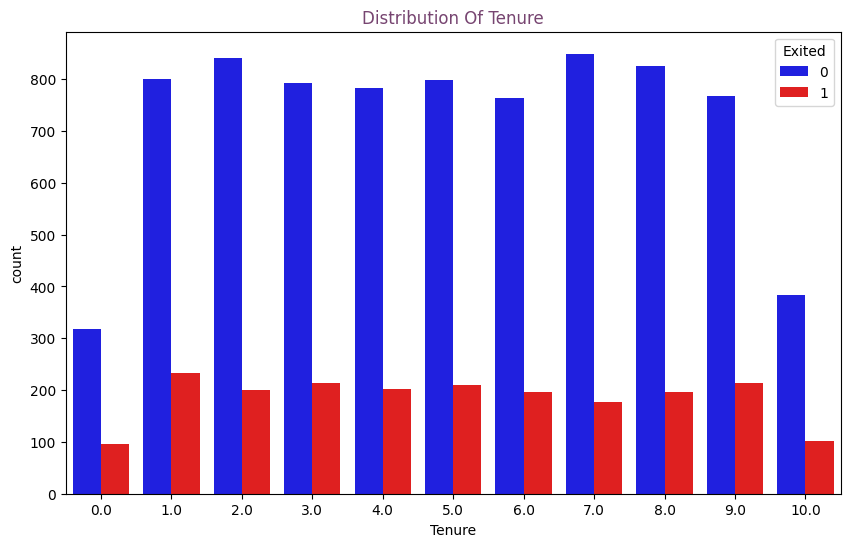

In [ ]:
plt.figure(figsize=(10,6))

Age_plot=sns.countplot(x=numerical_dt['Tenure'],data=raw_dt, hue ="Exited",palette = cols)
Age_plot.set_title("Distribution Of Tenure", color="#774571")

<ipython-input-32-f4787ca03689>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_dt['Tenure'])


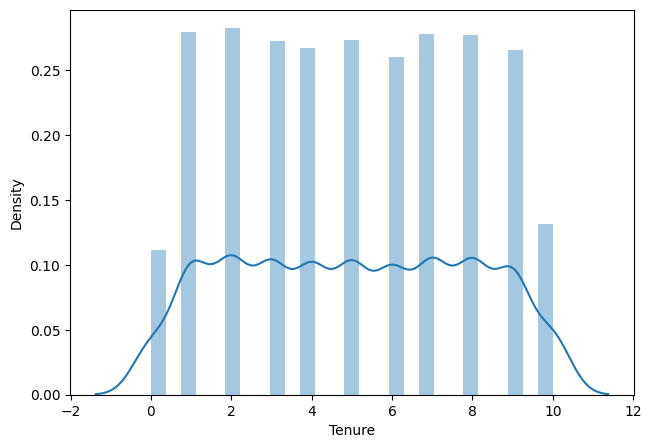

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(numerical_dt['Tenure'])


plt.show()

In [ ]:
numerical_dt

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


<ipython-input-34-95dd9c181f01>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_dt['Balance'])


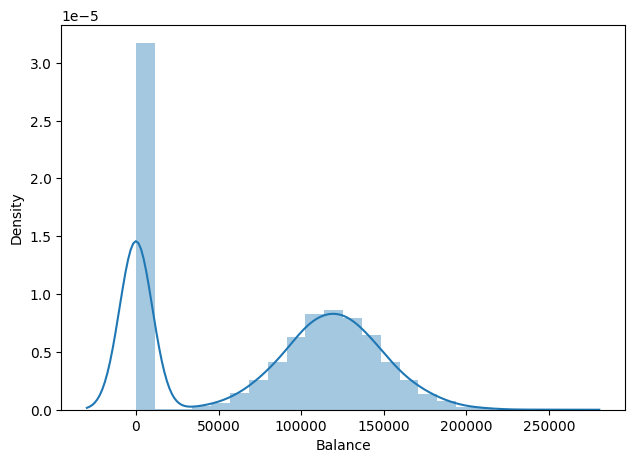

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(numerical_dt['Balance'])

plt.show()

<ipython-input-35-400f3a1ea6ab>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_dt['Age'])


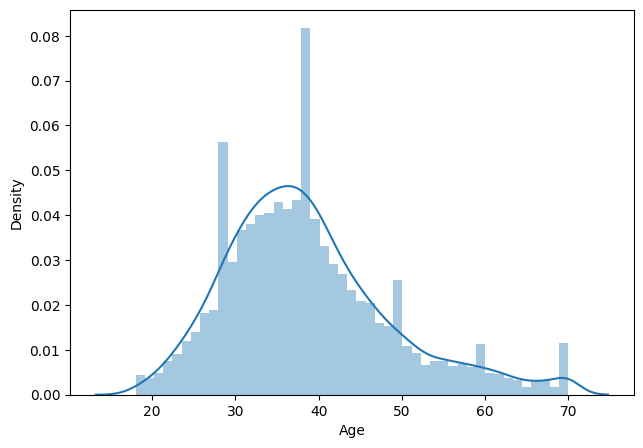

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(numerical_dt['Age'])

plt.show()



---

## 📊 Box Plot & Outlier Detection – Key Formulas

A **box plot** visually represents the **spread and central tendency** of data using **percentiles**. It also helps detect **outliers**.

---

### 🔹 **Key Terms and Formulas:**

#### ✅ **1. Quartiles**

* **Q1 (1st Quartile)**: 25th percentile — value below which 25% of the data lies
* **Q2 (Median)**: 50th percentile — the middle value of the dataset
* **Q3 (3rd Quartile)**: 75th percentile — value below which 75% of the data lies

---

#### ✅ **2. Interquartile Range (IQR)**

$$
\text{IQR} = Q3 - Q1
$$

* Represents the **range of the middle 50%** of the data
* Measures the spread and helps detect how compact or dispersed the data is

---

#### ✅ **3. Outlier Thresholds**

$$
\text{Lower Bound} = Q1 - 1.5 \times \text{IQR}
$$

$$
\text{Upper Bound} = Q3 + 1.5 \times \text{IQR}
$$

* Any data point **less than the lower bound** or **greater than the upper bound** is considered an **outlier**

---





⚠️ Outlier Removal Impact on Class Distribution
During outlier detection and removal (e.g., using Z-score or IQR method), I observed that most outliers belonged to the majority class (non-churn class = 0).

This unintentionally reduced the majority class size, making the dataset more balanced.



<ipython-input-36-0718ddf56288>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=numerical_dt, palette=cols_1)


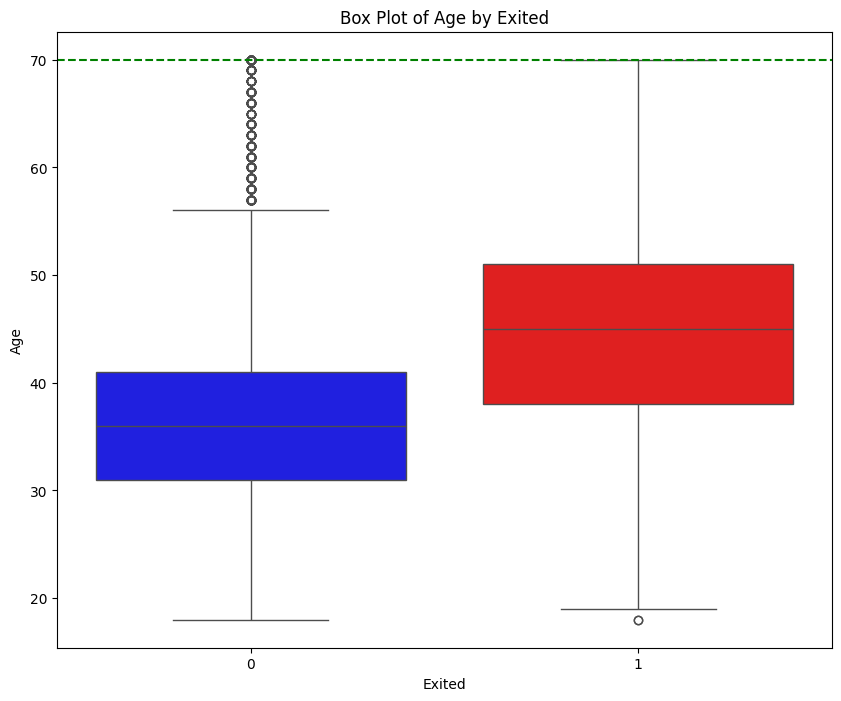

In [ ]:
cols_1= ["blue","red"]

plt.figure(figsize=(10, 8))
sns.boxplot(x='Exited', y='Age', data=numerical_dt, palette=cols_1)
plt.title('Box Plot of Age by Exited')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.axhline(y=70, color='green', linestyle='--')
plt.show()

<ipython-input-37-b1ef512fc2c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=numerical_dt, palette=cols_1)


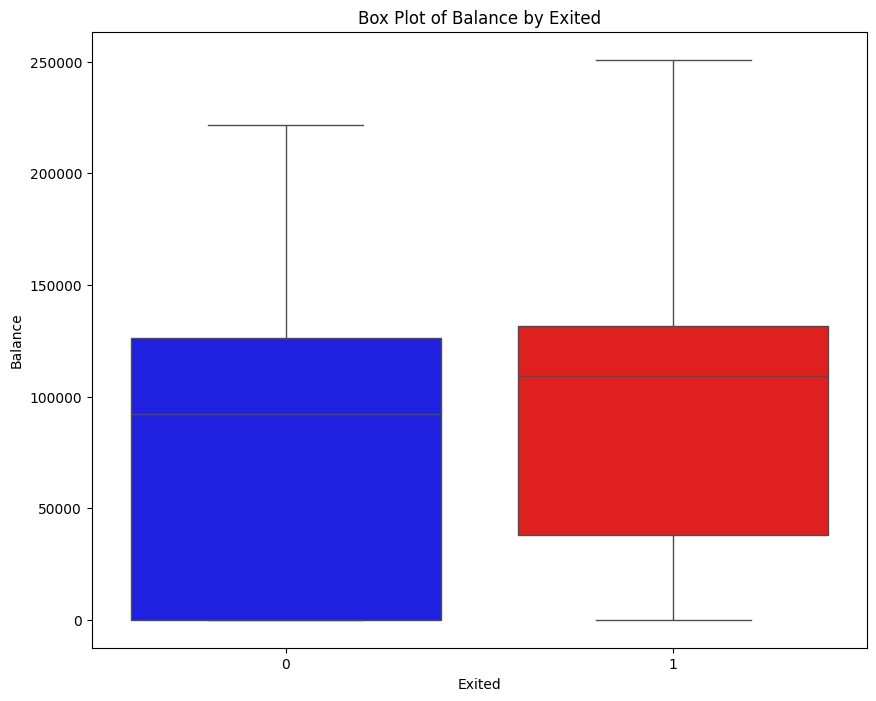

In [ ]:
cols_1= ["blue","red"]

plt.figure(figsize=(10, 8))
sns.boxplot(x='Exited', y='Balance', data=numerical_dt, palette=cols_1)
plt.title('Box Plot of Balance by Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')

plt.show()



---

## 📈 `sns.distplot()` — Visualizing Feature Distributions

* `sns.distplot()` is used to **visualize the distribution** of a numerical feature.
* Combines a **histogram** and **Kernel Density Estimate (KDE)** into a single plot for deeper insight.
* Helps understand:

  * The **shape** of the data (normal, skewed, multimodal, etc.)
  * **Central tendency** and **spread**
  * The presence of **gaps**, **outliers**, or **spikes** in the feature
* Useful for **deciding preprocessing steps**, like:

  * Whether to apply **scaling or transformation**
  * How to **bin or discretize** features
  * Whether the feature is suitable for **modeling as-is**
* Helps **compare features visually** for different classes when combined with `hue` or faceting.




<ipython-input-38-d48a4b0ed25f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_dt['EstimatedSalary'])


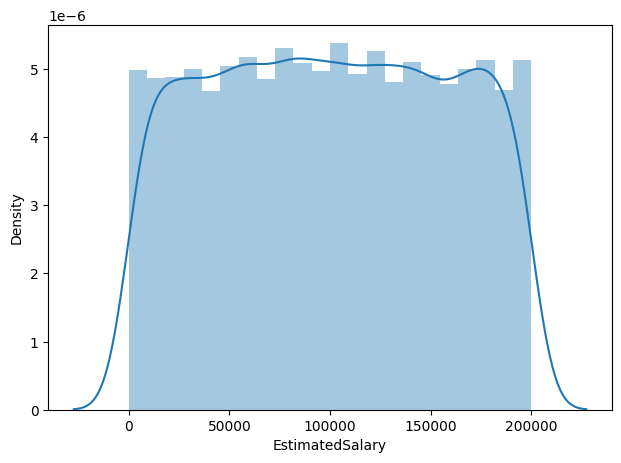

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(numerical_dt['EstimatedSalary'])

plt.show()

In [ ]:
temp_num=raw_dt[num_dt_list]
temp_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


<ipython-input-40-15ec6552a094>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_dt['CreditScore'])


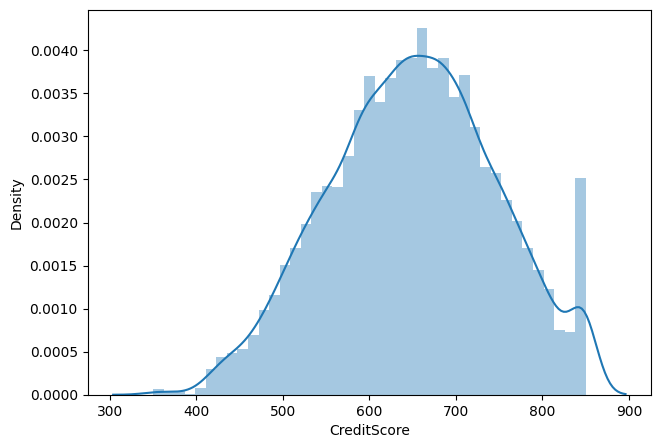

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(numerical_dt['CreditScore'])


plt.show()

<ipython-input-41-928bec8bb814>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=numerical_dt, palette=cols_1)


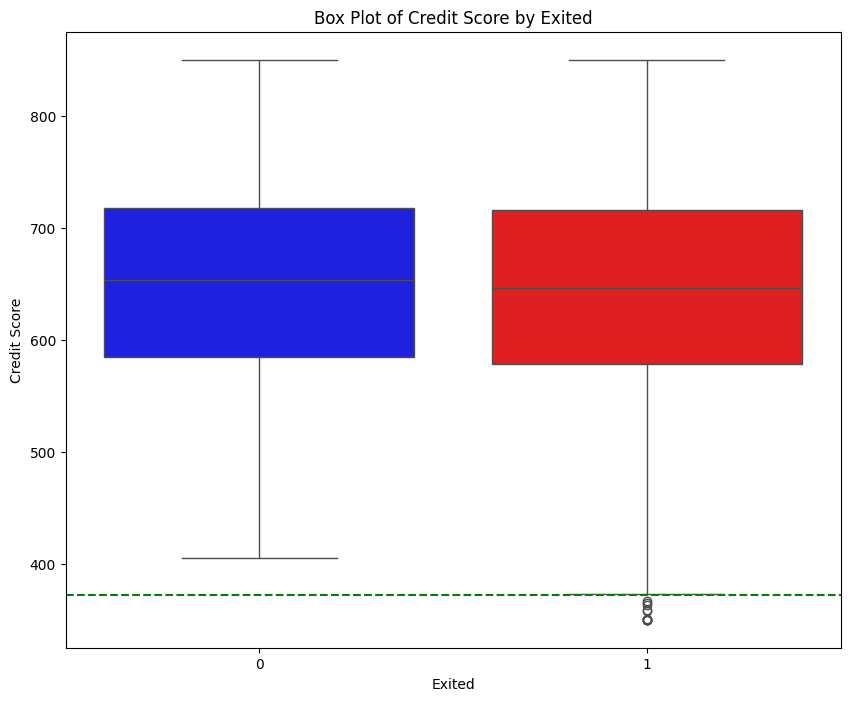

In [ ]:
cols_1= ["blue","red"]

plt.figure(figsize=(10, 8))
sns.boxplot(x='Exited', y='CreditScore', data=numerical_dt, palette=cols_1)
plt.title('Box Plot of Credit Score by Exited')
plt.xlabel('Exited')
plt.ylabel('Credit Score')

plt.axhline(y=372, color='green', linestyle='--')
plt.show()

In [ ]:
numerical_dt.loc[numerical_dt['CreditScore'] < 372, 'CreditScore'] = 372

<ipython-input-43-928bec8bb814>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=numerical_dt, palette=cols_1)


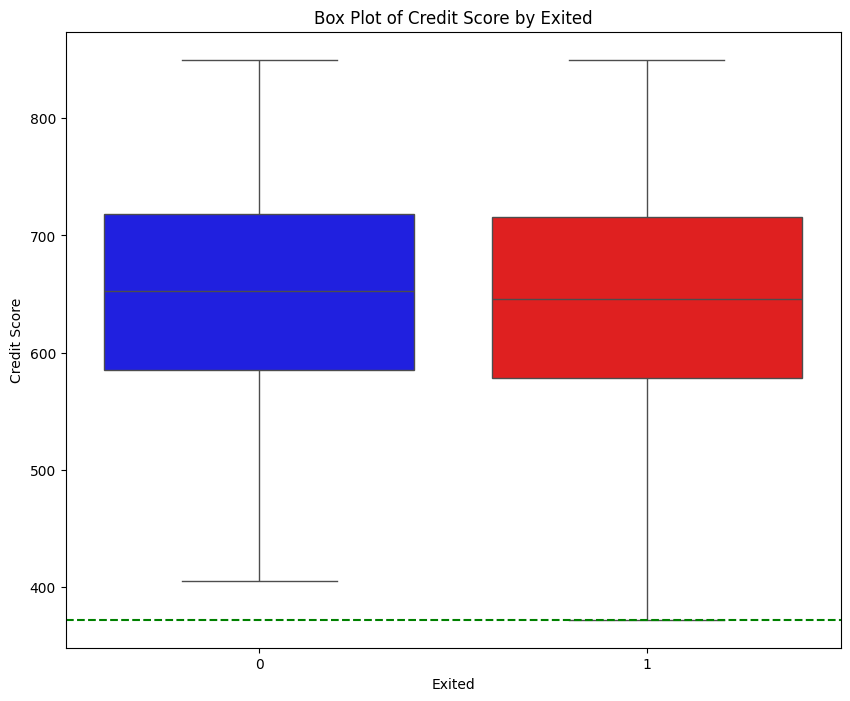

In [ ]:
cols_1= ["blue","red"]

plt.figure(figsize=(10, 8))
sns.boxplot(x='Exited', y='CreditScore', data=numerical_dt, palette=cols_1)
plt.title('Box Plot of Credit Score by Exited')
plt.xlabel('Exited')
plt.ylabel('Credit Score')

plt.axhline(y=372, color='green', linestyle='--')
plt.show()

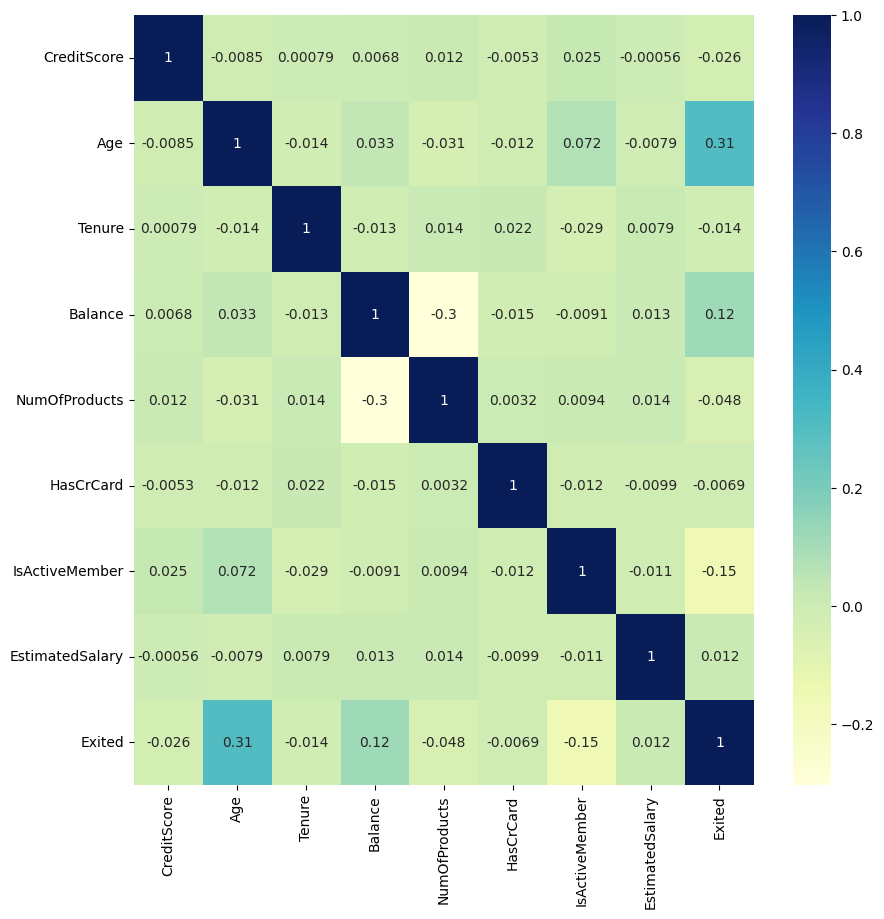

In [ ]:
corr = numerical_dt.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
numerical_dt

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


<ipython-input-46-28c997ff0884>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_dt['NumOfProducts'])


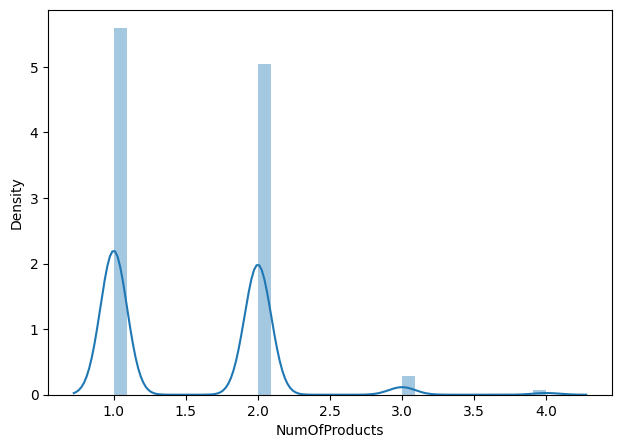

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(numerical_dt['NumOfProducts'])

plt.show()


plt.show()

In [ ]:


rows_to_drop = original_data[original_data['Age'] > 75].index
original_data = original_data.drop(rows_to_drop)
original_data.loc[original_data['Age'] > 70, 'Age'] = 70
original_data.loc[original_data['CreditScore'] < 372, 'CreditScore'] = 372
original_data


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:


original_data = original_data.reset_index(drop=True)


In [ ]:
original_data[(original_data['Exited']==0) & (original_data['Age']==70)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
85,652,Spain,Female,70,10,0.00,2,1,1,114675.75,0
158,646,France,Female,70,6,97259.25,1,0,1,104719.66,0
230,673,France,Male,70,1,0.00,2,0,1,111981.19,0
369,640,Germany,Female,70,1,106307.91,2,0,1,113428.77,0
557,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
...,...,...,...,...,...,...,...,...,...,...,...
9386,687,Spain,Female,70,4,0.00,2,1,1,50267.69,0
9389,737,France,Female,70,9,87542.89,2,1,1,42576.86,0
9433,775,Germany,Female,70,0,161371.50,1,1,1,134869.93,0
9548,632,France,Male,70,3,83116.68,1,1,1,27597.76,0


In [ ]:
original_data['Exited'].value_counts()

,count
Exited,
0,7919
1,2036


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

df = original_data.copy()
X = df.drop(columns=['Exited','HasCrCard'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_majority = df_train[df_train['Exited'] == 0]
df_minority = df_train[df_train['Exited'] == 1]



---

## ✅ Feature Scaling Strategy: MinMax vs Standard Scaler

### 🔹 When I used **MinMaxScaler**:

* For features that were **uniformly or linearly distributed** without heavy tails or skewness.
* Ensures data is scaled between **\[0, 1]**, preserving the shape of the original distribution.

#### 📌 **Formula:**

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

---

### 🔹 When I used **StandardScaler**:

* For features that had a **non-normal, uneven, or skewed distribution**.
* Transformed the feature to have **mean = 0** and **standard deviation = 1**.
* Helpful for models like ANN or SVM that are sensitive to feature scale and assume Gaussian-like behavior in inputs.

#### 📌 **Formula:**

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

Where:

* $\mu$ = mean of the feature
* $\sigma$ = standard deviation of the feature

---

### 🧠 Why This Approach Works:

* **MinMaxScaler** retains the original distribution's shape — good for uniformly spread features.
* **StandardScaler** normalizes scale while dampening the influence of skewed values — ideal for non-uniform data.

> ✅ Using the appropriate scaler based on the **distribution of each feature** improves model convergence and stability.

---



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# Load data
df = original_data.copy()
X = df.drop(columns=['Exited'])
y = df['Exited']

# Train-Val-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

# Preprocessing (fit only on training data)
stsc = ['CreditScore', 'Balance', 'Age']
cate_list = ['Geography', 'Gender']
minma = ['Tenure', 'EstimatedSalary']

transformer = ColumnTransformer(transformers=[
    ('tnf1', StandardScaler(), stsc),
    ('tnf2', MinMaxScaler(), minma),
    ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), cate_list)
], remainder='passthrough')

X_train_transformed = transformer.fit_transform(X_train)
X_val_transformed = transformer.transform(X_val)
X_test_transformed = transformer.transform(X_test)

# Undersampling function
def undersampled_data(X_train_trans, y_train, random_state=None):
    df_train = pd.DataFrame(X_train_trans)
    df_train['Exited'] = y_train.reset_index(drop=True)

    df_majority = df_train[df_train['Exited'] == 0]
    df_minority = df_train[df_train['Exited'] == 1]

    df_majority_sampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=random_state)
    df_balanced = pd.concat([df_majority_sampled, df_minority])
    df_balanced = df_balanced.sample(frac=1, random_state=random_state).reset_index(drop=True)  # Shuffle

    return df_balanced.drop(columns=['Exited']), df_balanced['Exited']

# Model creation (with slight variations)
def create_model(layers, input_dim, activation="elu", dropout_rate=0.05, learning_rate=0.001, l2_reg=0.001):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=input_dim, kernel_initializer=tf.keras.initializers.HeUniform(),
                          kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        else:
            model.add(Dense(nodes, kernel_initializer=tf.keras.initializers.HeUniform(),
                          kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train 3 different models with slight variations
models = []
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model 1: Default settings
X_train_bal1, y_train_bal1 = undersampled_data(X_train_transformed, y_train, random_state=42)
model1 = create_model([6, 3], input_dim=X_train_bal1.shape[1])
model1.fit(X_train_bal1, y_train_bal1, epochs=40, batch_size=32, verbose=0,
           validation_data=(X_val_transformed, y_val), callbacks=[early_stopping])
models.append(model1)

# Model 2: Deeper network
X_train_bal2, y_train_bal2 = undersampled_data(X_train_transformed, y_train, random_state=100)
model2 = create_model([8, 4, 2], input_dim=X_train_bal2.shape[1], dropout_rate=0.1)
model2.fit(X_train_bal2, y_train_bal2, epochs=40, batch_size=32, verbose=0,
           validation_data=(X_val_transformed, y_val), callbacks=[early_stopping])
models.append(model2)

# Model 3: Wider network, higher regularization
X_train_bal3, y_train_bal3 = undersampled_data(X_train_transformed, y_train, random_state=200)
model3 = create_model([12, 6], input_dim=X_train_bal3.shape[1], l2_reg=0.01, learning_rate=0.0005)
model3.fit(X_train_bal3, y_train_bal3, epochs=40, batch_size=32, verbose=0,
           validation_data=(X_val_transformed, y_val), callbacks=[early_stopping])
models.append(model3)

# Ensemble predictions (averaging probabilities)
def ensemble_predict(models, X):
    preds = [model.predict(X, verbose=0) for model in models]
    avg_preds = np.mean(preds, axis=0)
    return (avg_preds > 0.5).astype(int)  # Threshold at 0.5

# Evaluate ensemble
y_test_pred = ensemble_predict(models, X_test_transformed)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Ensemble Test Accuracy: {test_accuracy:.4f}")




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6259 - loss: 0.7230 - val_accuracy: 0.7435 - val_loss: 0.5811
Epoch 2/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6594 - loss: 0.6591 - val_accuracy: 0.7268 - val_loss: 0.5926
Epoch 3/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6979 - loss: 0.6149 - val_accuracy: 0.7209 - val_loss: 0.5962
Epoch 4/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6772 - loss: 0.6201 - val_accuracy: 0.7276 - val_loss: 0.5876
Epoch 5/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7183 - loss: 0.5937 - val_accuracy: 0.7305 - val_loss: 0.5835
Epoch 6/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7146 - loss: 0.5853 - val_accuracy: 0.7280 - val_loss: 0.5847
Epoch 7/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7093 - loss: 0.5944 - val_accuracy: 0.7251 - val_loss: 0.5851
Epoch 8/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7314 - loss: 0.5765 - val_accuracy: 0.7234 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5098 - loss: 0.7468 - val_accuracy: 0.6632 - val_loss: 0.6417
Epoch 2/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5827 - loss: 0.6980 - val_accuracy: 0.7017 - val_loss: 0.6092
Epoch 3/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6630 - loss: 0.6475 - val_accuracy: 0.7117 - val_loss: 0.5874
Epoch 4/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6640 - loss: 0.6266 - val_accuracy: 0.7255 - val_loss: 0.5672
Epoch 5/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6780 - loss: 0.6308 - val_accuracy: 0.7234 - val_loss: 0.5646
Epoch 6/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6743 - loss: 0.6264 - val_accuracy: 0.7243 - val_loss: 0.5599
Epoch 7/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6822 - loss: 0.6223 - val_accuracy: 0.7163 - val_loss: 0.5638
Epoch 8/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7048 - loss: 0.5984 - val_accuracy: 0.7117 - val_loss: 0.5642

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5703 - loss: 0.7713 - val_accuracy: 0.6088 - val_loss: 0.7248
Epoch 2/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6212 - loss: 0.6890 - val_accuracy: 0.6678 - val_loss: 0.6481
Epoch 3/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6281 - loss: 0.6618 - val_accuracy: 0.6954 - val_loss: 0.6092
Epoch 4/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6677 - loss: 0.6299 - val_accuracy: 0.7159 - val_loss: 0.5908
Epoch 5/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6871 - loss: 0.6144 - val_accuracy: 0.7305 - val_loss: 0.5743
Epoch 6/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7033 - loss: 0.6071 - val_accuracy: 0.7389 - val_loss: 0.5673
Epoch 7/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7060 - loss: 0.5936 - val_accuracy: 0.7414 - val_loss: 0.5625
Epoch 8/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7128 - loss: 0.5832 - val_accuracy: 0.7456 - val_loss: 0.5626

In [ ]:

for i, model in enumerate(models):
    y_pred = (model.predict(X_test_final) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model {i+1} Test Accuracy: {acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model 1 Test Accuracy: 0.7428
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model 2 Test Accuracy: 0.7233
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model 3 Test Accuracy: 0.7664


In [ ]:
from sklearn.metrics import classification_report


for i, model in enumerate(models):
    y_pred = (model.predict(X_test_final) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)

    report = classification_report(y_test, y_pred, target_names=['Not Exited', 'Exited'])

    print(f"\nModel {i+1} Performance:")
    print(f"Test Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model 1 Performance:
Test Accuracy: 0.7428
Classification Report:
              precision    recall  f1-score   support

  Not Exited       0.92      0.75      0.82      1584
      Exited       0.43      0.73      0.54       407

    accuracy                           0.74      1991
   macro avg       0.67      0.74      0.68      1991
weighted avg       0.82      0.74      0.76      1991

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model 2 Performance:
Test Accuracy: 0.7233
Classification Report:
              precision    recall  f1-score   support

  Not Exited       0.90      0.73      0.81      1584
      Exited       0.40      0.69      0.50       407

    accuracy                           0.72      1991
   macro avg       0.65      0.71      0.66      1991
weighted avg       0.80      0.72      0.75      1991

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model 3 Performance:
Test Accuracy: 0.7664
Classification Report:
              precision    r

In [ ]:
import numpy as np

# Make predictions with each model
predictions = []
for model in models:
    predictions.append(model.predict(X_test_final))

# Majority voting (hard voting)
binary_preds = [(model.predict(X_test_final) > 0.5).astype(int) for model in models]
ensemble_pred_binary = (np.mean(binary_preds, axis=0) > 0.5).astype(int)

# Evaluate the ensemble prediction
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, ensemble_pred_binary)
report = classification_report(y_test, ensemble_pred_binary, target_names=['Not Exited', 'Exited'])

print("Ensemble Model Performance:")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)  # Explicitly print the report


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Ensemble Model Performance:
Test Accuracy: 0.7413

Classification Report:
              precision    recall  f1-score   support

  Not Exited       0.91      0.75      0.82      1584
      Exited       0.42      0.72      0.53       407

    accuracy                           0.74      1991
   macro avg       0.67      0.73      0.68      1991
weighted avg       0.81      0.74      0.76      1991



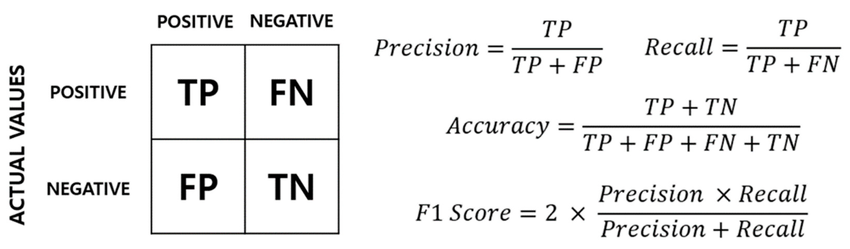